In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("./data/193.csv", delimiter=";", quotechar="|", index_col="id")
df.shape

(5000, 19)

In [3]:
def normalize_type(value):
    if value == "penthouse":
        return "apartamento"
    
    elif value == "flat":
        return "apartamento"

    elif value == "loft":
        return "apartamento"

    elif value == "sobrado":
        return "casa"

    elif value == "geminada":
        return "casa"
    
    elif value == "condominium":
        return "casa"
    
    elif value == "kitnet":
        return "casa"
    
    return value

df["main_type"] = df["type"].apply(normalize_type)

In [4]:
def convert_flood_quota(value):
    return 21 if pd.isna(value) else value

# Use the apply method with the custom function
df["flood_quota"] = df["flood_quota"].apply(convert_flood_quota)

In [5]:
def check_security(value):
    if value < 8.13:
        return 1
    
    elif 8.14 < value < 9.15:
        return 2
    
    elif 9.16 < value < 12.6:
        return 3
    
    else:
        return 4

df["security"] = df["flood_quota"].apply(check_security)

In [6]:
df["price"] = df["price"].apply(lambda v: v / 1000)

In [7]:
df_venda = df[df["modality_name"] == "venda"]

In [29]:
properties = df_venda.loc[:, ["price", "rooms", "bathrooms", "size", "parking_space", "main_type", "neighborhood_name", "security"]]
properties

,price,rooms,bathrooms,size,parking_space,main_type,neighborhood_name,security
id,,,,,,,,
2,1500.00,3,4,325.00,2,casa,Itoupava Norte,4
4,560.00,3,2,822.26,1,casa,Progresso,4
8,111.08,2,1,62.00,1,apartamento,Itoupava Central,4
10,950.00,3,4,259.50,2,casa,Itoupava Norte,4
11,380.00,4,2,150.00,1,apartamento,Vila Nova,4
...,...,...,...,...,...,...,...,...
9685,1100.00,3,4,260.00,2,apartamento,Vorstadt,4
9686,1100.00,0,0,776.00,0,loteterreno,Itoupava Seca,4
9688,1100.00,3,3,383.00,2,casa,Fortaleza,4


In [30]:
grafico = px.treemap(properties, path=["main_type", "neighborhood_name"])
grafico

In [32]:
only_houses = properties[properties["main_type"] == "casa"]
only_houses.head()

,price,rooms,bathrooms,size,parking_space,main_type,neighborhood_name,security
id,,,,,,,,
2,1500.0,3,4,325.00,2,casa,Itoupava Norte,4
4,560.0,3,2,822.26,1,casa,Progresso,4
10,950.0,3,4,259.50,2,casa,Itoupava Norte,4
12,650.0,4,4,274.77,2,casa,Velha,4
19,1100.0,5,3,431.85,3,casa,Itoupava Norte,4


X e Y com apenas casas

In [33]:
x_properties = only_houses.loc[:, ["rooms", "bathrooms", "size", "parking_space", "neighborhood_name", "security"]]
x_properties

,rooms,bathrooms,size,parking_space,neighborhood_name,security
id,,,,,,
2,3,4,325.00,2,Itoupava Norte,4
4,3,2,822.26,1,Progresso,4
10,3,4,259.50,2,Itoupava Norte,4
12,4,4,274.77,2,Velha,4
19,5,3,431.85,3,Itoupava Norte,4
...,...,...,...,...,...,...
9659,3,1,180.00,3,Velha,4
9673,3,3,181.00,2,Salto Do Norte,4
9678,3,3,265.00,2,Velha Central,4


In [34]:
y_properties = only_houses.loc[:, ["price"]]
y_properties

,price
id,
2,1500.0
4,560.0
10,950.0
12,650.0
19,1100.0
...,...
9659,1080.0
9673,1099.0
9678,1100.0


In [35]:
fig = px.scatter(only_houses, y="size", x="price")
fig.show()

Enconder

In [36]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder_neighborhood = LabelEncoder()

In [37]:
x_properties.iloc[:, 4] = label_encoder_neighborhood.fit_transform(x_properties.iloc[:, 4])

In [38]:
x_properties

,rooms,bathrooms,size,parking_space,neighborhood_name,security
id,,,,,,
2,3,4,325.00,2,13,4
4,3,2,822.26,1,20,4
10,3,4,259.50,2,13,4
12,4,4,274.77,2,27,4
19,5,3,431.85,3,13,4
...,...,...,...,...,...,...
9659,3,1,180.00,3,27,4
9673,3,3,181.00,2,22,4
9678,3,3,265.00,2,28,4


Verificando correlação

In [39]:
temp = x_properties.copy(deep=True)
temp["price"] = y_properties
temp

,rooms,bathrooms,size,parking_space,neighborhood_name,security,price
id,,,,,,,
2,3,4,325.00,2,13,4,1500.0
4,3,2,822.26,1,20,4,560.0
10,3,4,259.50,2,13,4,950.0
12,4,4,274.77,2,27,4,650.0
19,5,3,431.85,3,13,4,1100.0
...,...,...,...,...,...,...,...
9659,3,1,180.00,3,27,4,1080.0
9673,3,3,181.00,2,22,4,1099.0
9678,3,3,265.00,2,28,4,1100.0


<Axes: title={'center': 'Correlation Matrix'}>

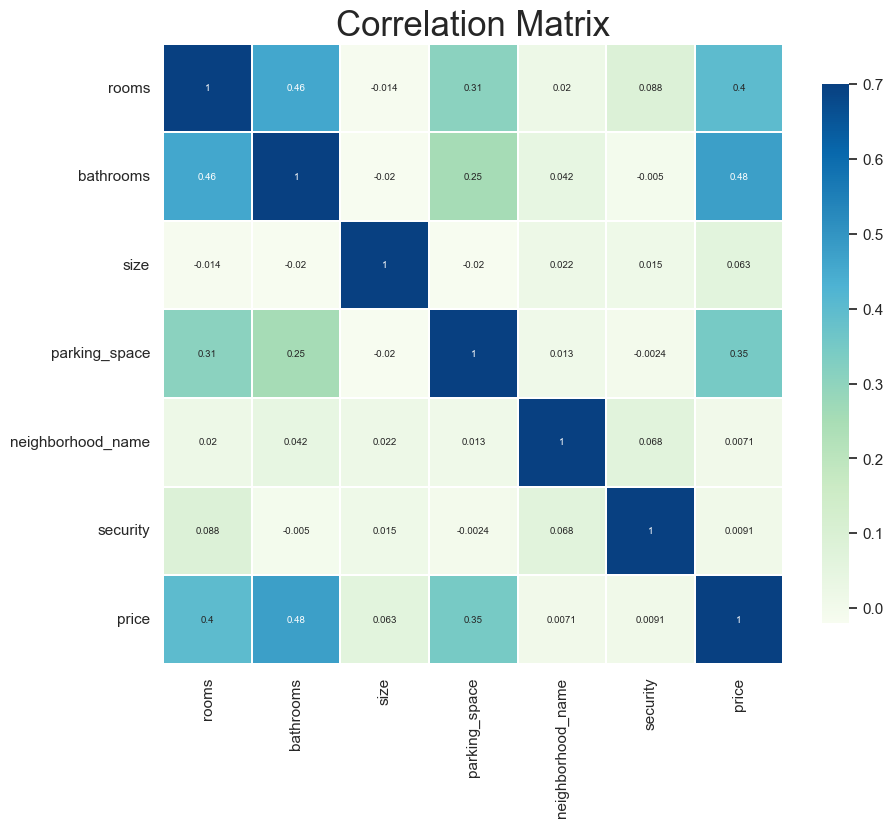

In [40]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(10,10))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(temp.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

C:\Users\thoma\AppData\Local\Temp\ipykernel_16484\2317921059.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




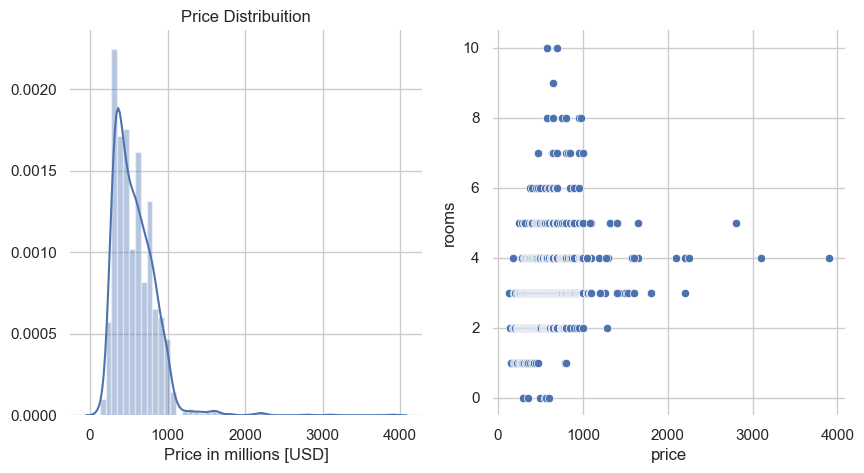

In [41]:
f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.distplot(only_houses['price'], ax=axes[0])
sns.scatterplot(x='price',y='rooms', data=only_houses, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition');

Selecionando colunas mais correlatas

In [22]:
# x_properties = only_houses.loc[:, ["rooms", "bathrooms", "parking_space", "zip_code"]]
# x_properties

,rooms,bathrooms,parking_space,zip_code
id,,,,
2,3,4,2,89053-073
4,3,2,1,89026-250
10,3,4,2,89053-460
12,4,4,2,89040-090
19,5,3,3,89053-520
...,...,...,...,...
9659,3,1,3,89036-256
9673,3,3,2,89065-345
9678,3,3,2,89040-485


In [42]:
x_properties

,rooms,bathrooms,size,parking_space,neighborhood_name,security
id,,,,,,
2,3,4,325.00,2,13,4
4,3,2,822.26,1,20,4
10,3,4,259.50,2,13,4
12,4,4,274.77,2,27,4
19,5,3,431.85,3,13,4
...,...,...,...,...,...,...
9659,3,1,180.00,3,27,4
9673,3,3,181.00,2,22,4
9678,3,3,265.00,2,28,4


OneHot Encoder

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [44]:
onehot_encoder_properties = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [4])], remainder="passthrough")

In [45]:
hot_properties = onehot_encoder_properties.fit_transform(x_properties).toarray()

In [46]:
hot_properties.shape

(2044, 37)

Padronização

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler_properties = MinMaxScaler()
x_scaler_properties = scaler_properties.fit_transform(hot_properties, y_properties)

In [51]:
y_scaler_properties_class = MinMaxScaler()
y_scaler_properties = y_scaler_properties_class.fit_transform(y_properties)

In [52]:
y_scaler_properties[0]

array([0.36423841])

Split

In [53]:
from sklearn.model_selection import train_test_split

In [59]:
x_properties_train, x_properties_test, y_properties_train, y_properties_test = train_test_split(x_scaler_properties, y_scaler_properties, test_size=0.25, random_state=0)

In [60]:
y_properties_test

array([[0.12582781],
       [0.0410596 ],
       [0.13907285],
       [0.06490066],
       [0.13907285],
       [0.10198675],
       [0.25827815],
       [0.08609272],
       [0.06198675],
       [0.05165563],
       [0.08874172],
       [0.07019868],
       [0.06357616],
       [0.07682119],
       [0.0781457 ],
       [0.0794702 ],
       [0.05430464],
       [0.1205298 ],
       [0.04609272],
       [0.2013245 ],
       [0.13907285],
       [0.20529801],
       [0.16556291],
       [0.05695364],
       [0.07019868],
       [0.04503311],
       [0.13642384],
       [0.12317881],
       [0.14966887],
       [0.21192053],
       [0.14701987],
       [0.17880795],
       [0.04370861],
       [0.08874172],
       [0.04875682],
       [0.16556291],
       [0.12556291],
       [0.05562914],
       [0.11523179],
       [0.21854305],
       [0.06490066],
       [0.09403974],
       [0.08556291],
       [0.0410596 ],
       [0.18410596],
       [0.05827815],
       [0.16556291],
       [0.192

In [61]:
x_properties_train.shape, x_properties_test.shape

((1533, 37), (511, 37))

Salvando

In [56]:
import pickle

In [57]:
with open("./data/scalller_prices_houses.pkl", mode="wb") as file:
    pickle.dump([x_properties_train, y_properties_train, x_properties_test, y_properties_test], file)